**Training Using Cifar Dataset**

Trains a convolutional neural network (CNN) for classifying images from the CIFAR-10 dataset. Here's a breakdown of each section:

In [1]:
#1. Importing Libraries:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [2]:
#2. Loading CIFAR-10 Dataset:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
#Check shape of dataset
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


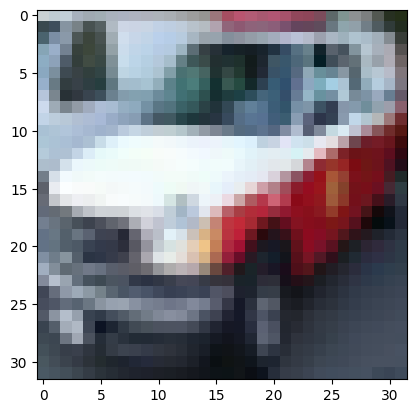

In [4]:
#3. Visualizing Sample Image:
plt.imshow(x_train[60])

In [5]:
#4. Normalization Function:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

#5. Image Data Augmentation:
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [6]:
#6. Splitting Validation Set:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.6, random_state = 0)

In [7]:
#7. Preprocessing Data:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

#8. One-Hot Encoding Labels:
y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [9]:
#9. Defining the Model (results function):
def results(model):
  epoch = 10
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val) , verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

Epoch 1/10
1562/1562 [==============================] - 44s 24ms/step - loss: 1.7413 - accuracy: 0.3937 - val_loss: 1.4775 - val_accuracy: 0.5177
Epoch 2/10
1562/1562 [==============================] - 36s 23ms/step - loss: 1.3862 - accuracy: 0.5328 - val_loss: 1.3690 - val_accuracy: 0.5582
Epoch 3/10
1562/1562 [==============================] - 35s 22ms/step - loss: 1.1765 - accuracy: 0.6079 - val_loss: 1.2387 - val_accuracy: 0.6003
Epoch 4/10
1562/1562 [==============================] - 34s 22ms/step - loss: 1.0273 - accuracy: 0.6627 - val_loss: 1.0203 - val_accuracy: 0.6757
Epoch 5/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.9398 - accuracy: 0.6971 - val_loss: 0.9475 - val_accuracy: 0.6952
Epoch 6/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.8846 - accuracy: 0.7177 - val_loss: 0.9173 - val_accuracy: 0.7222
Epoch 7/10
1562/1562 [==============================] - 35s 22ms/step - loss: 0.8484 - accuracy: 0.7289 - val_loss: 0.9024 -

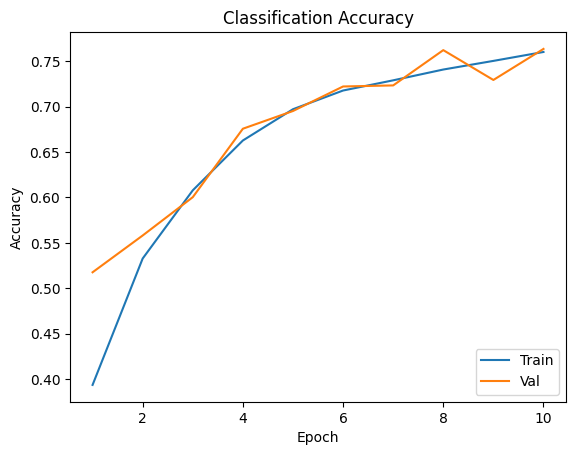

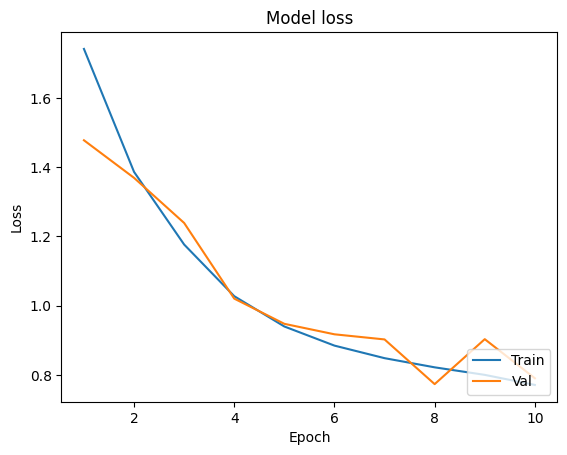

In [10]:
#Training the Model
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

results(model)

In [11]:
model.save("model.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
